In [1]:
## Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from util.apifuncionario import buscaFuncionarios

In [2]:
# Retorna dados da API RM
data = buscaFuncionarios('0101127')

In [30]:
# Normaliza os dados, seleciona colunas e as renomeia
df_ori = pd.json_normalize(data)
df = df_ori[['CODPESSOA','CODSITUACAO','SALARIO','SEXO','IDADE','CORRACA','GRAUINSTRUCAO','ESTADOCIVIL','NRODEPIRRF','NROFILHOSBRASIL','NOME','Login','API']]
df.rename(columns={'Login':'LOGIN'}, inplace=True)

In [31]:
# Exclusão de dados não utilizados
df.drop(columns=['LOGIN','NOME','NRODEPIRRF'], axis=1, inplace=True)

In [32]:
# Apresentação dos dados
df.head()

,CODPESSOA,CODSITUACAO,SALARIO,SEXO,IDADE,CORRACA,GRAUINSTRUCAO,ESTADOCIVIL,NROFILHOSBRASIL,API
0,4861,A,9688.0,None,37.0,None,None,None,None,M;PARDA;POS GRAD. COMPLETO;SOLTEIRO;S;1
1,6026,D,5316.0,None,29.0,None,None,None,None,M;BRANCA;EDUCAÇÃO SUPERIOR COMPLETO;SOLTEIRO;S;0
2,4754,D,23950.0,None,45.0,None,None,None,None,M;BRANCA;POS GRAD. COMPLETO;CASADO;C;0
3,239,D,14053.0,None,56.0,None,None,None,None,M;BRANCA;EDUCAÇÃO SUPERIOR COMPLETO;CASADO;C;1
4,6185,D,5316.0,None,30.0,None,None,None,None,M;PRETA/NEGRA;EDUCAÇÃO SUPERIOR COMPLETO;SOLTE...


In [33]:
# Separa a coluna API em novas colunas
# Nova lista com split da coluna
df['SEXO'] = df["API"].str.split(";", expand = True)[0]
df['CORRACA'] = df["API"].str.split(";", expand = True)[1]
df['GRAUINSTRUCAO'] = df["API"].str.split(";", expand = True)[2]
df['ESTADOCIVIL'] = df["API"].str.split(";", expand = True)[3]
df['NROFILHOSBRASIL'] = df["API"].str.split(";", expand = True)[5]

df.drop(columns=['API'], axis=1, inplace=True)

In [38]:
# Converte a coluna em inteiro
df['NROFILHOSBRASIL'] = pd.to_numeric(df['NROFILHOSBRASIL'])

In [39]:
df.head()

,CODPESSOA,CODSITUACAO,SALARIO,SEXO,IDADE,CORRACA,GRAUINSTRUCAO,ESTADOCIVIL,NROFILHOSBRASIL
0,4861,A,9688.0,M,37.0,PARDA,POS GRAD. COMPLETO,SOLTEIRO,1
1,6026,D,5316.0,M,29.0,BRANCA,EDUCAÇÃO SUPERIOR COMPLETO,SOLTEIRO,0
2,4754,D,23950.0,M,45.0,BRANCA,POS GRAD. COMPLETO,CASADO,0
3,239,D,14053.0,M,56.0,BRANCA,EDUCAÇÃO SUPERIOR COMPLETO,CASADO,1
4,6185,D,5316.0,M,30.0,PRETA/NEGRA,EDUCAÇÃO SUPERIOR COMPLETO,SOLTEIRO,2


In [41]:
# Características do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODPESSOA        10 non-null     int64  
 1   CODSITUACAO      10 non-null     object 
 2   SALARIO          10 non-null     float64
 3   SEXO             10 non-null     object 
 4   IDADE            10 non-null     float64
 5   CORRACA          10 non-null     object 
 6   GRAUINSTRUCAO    10 non-null     object 
 7   ESTADOCIVIL      10 non-null     object 
 8   NROFILHOSBRASIL  10 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 848.0+ bytes


In [42]:
# Contagem de dados nulos
df.isnull().sum()

CODPESSOA          0
CODSITUACAO        0
SALARIO            0
SEXO               0
IDADE              0
CORRACA            0
GRAUINSTRUCAO      0
ESTADOCIVIL        0
NROFILHOSBRASIL    0
dtype: int64

In [37]:
# Descrição inicial dos dados
df.describe()

,CODPESSOA,SALARIO,IDADE,NROFILHOSBRASIL
count,10.00000,10.000000,10.000000,10.00000
mean,4656.80000,9690.400000,37.300000,0.70000
std,2297.77181,5823.043939,8.260347,1.05935
min,239.00000,4944.000000,29.000000,0.00000
25%,4780.75000,5412.750000,31.500000,0.00000
50%,5790.50000,8339.000000,35.500000,0.00000
75%,6113.00000,10864.000000,40.000000,1.00000
max,6196.00000,23950.000000,56.000000,3.00000


Text(0.5, 1.0, 'Funcionários x Filhos')

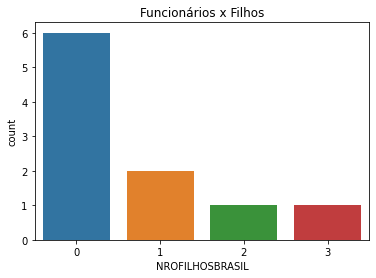

In [43]:
# Funcionários por área
sns.countplot(x='NROFILHOSBRASIL', data=df)
plt.title('Funcionários x Filhos')

<AxesSubplot:>

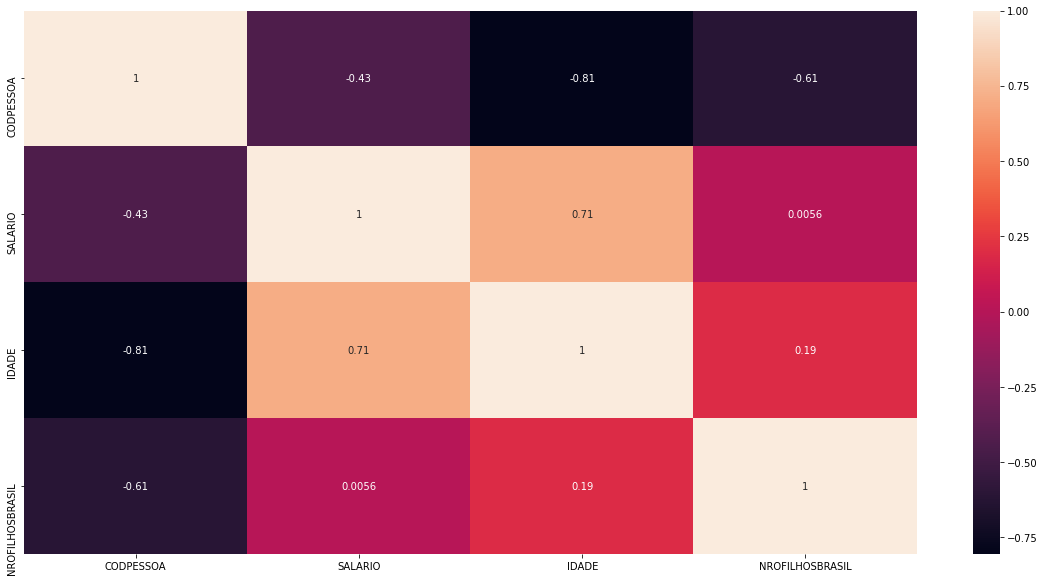

In [44]:
# Correlação de variáveis
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True)

<AxesSubplot:xlabel='IDADE'>

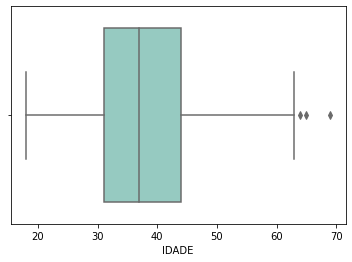

In [11]:
# Distribuição de faixa etária
sns.boxplot(x="IDADE", data=df, palette="Set3")

<AxesSubplot:xlabel='SALARIO'>

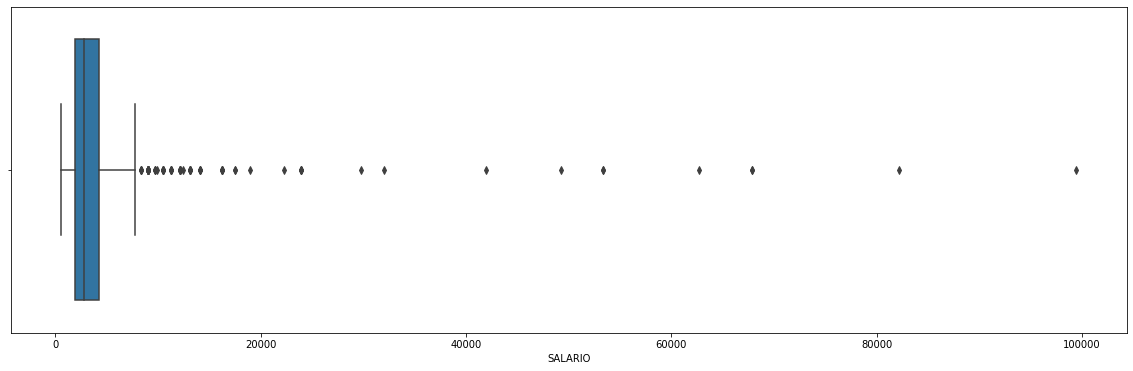

In [12]:
# Distribuição Salarial
plt.figure(figsize=(20,6))
sns.boxplot(x="SALARIO", data=df)

Text(0.5, 1.0, 'Tempo de casa dos funcionários ativos')

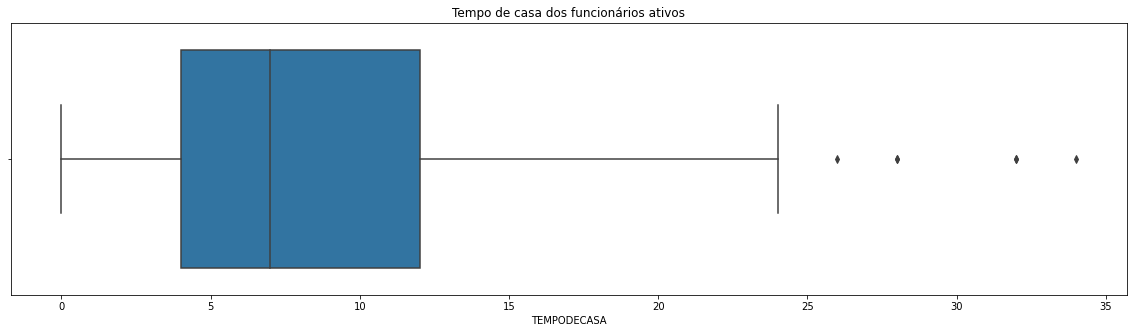

In [13]:
# Tempo de casa dos colaboradores ativos
df_ativos = df[df["SITUACAO"] == 1]
df_ativos.count()
plt.figure(figsize=(20,5))
sns.boxplot(x="TEMPODECASA", data=df_ativos)
plt.title('Tempo de casa dos funcionários ativos')

In [14]:
# Normalização de dados
x = df_ativos.values # retorna um numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_ativos_n = pd.DataFrame(x_scaled, columns=df.columns)

df_ativos.head()

,NP,IDADE,TEMPODECASA,SALARIO,AREA,SITUACAO
0,188,46,26,18923,3,1
1,208,54,24,14053,3,1
2,3217,44,16,62647,3,1
3,3894,36,16,3693,3,1
4,4127,37,15,8987,3,1


In [15]:
# Importando o KMeans
from sklearn.cluster import KMeans


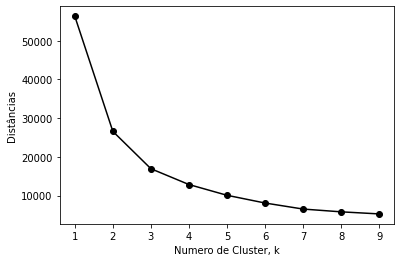

In [16]:
# Aplicando o curva do cootovelo para encontrar o número de clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Cria o obeto para modelo kmens para os testes
    model = KMeans(n_clusters=k)
    
    # Aplica nas componentes selecionadas (2 componentes)
    model.fit(df_ativos[['IDADE','TEMPODECASA']].iloc[:,:2])
    
    # Adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

In [17]:
# Observação em cima dos dados de tempo de casa e salario
segmentacao = df_ativos[['IDADE','TEMPODECASA']].iloc[:,:].values

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(segmentacao)
y_kmeans = kmeans.predict(segmentacao)


Text(0.5, 1.0, 'Segmentação de funcionários - Idade x Tempo de casa')

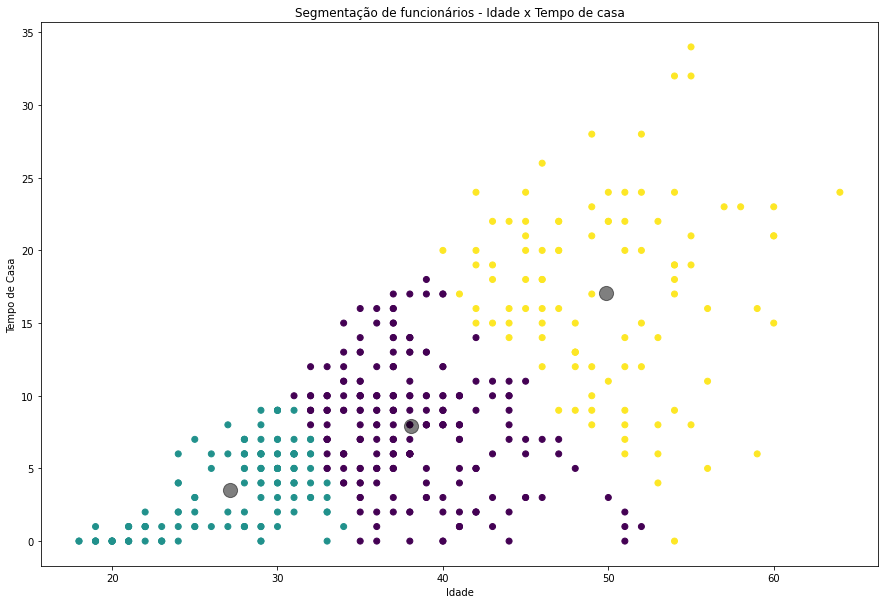

In [19]:
# Gráfico clusterizado
plt.figure(figsize = (15 , 10) ) #define o tamanho da figura

plt.scatter(segmentacao[:, 0], segmentacao[:, 1], c=y_kmeans, cmap='viridis') # constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ # encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) # realiza o plot de cada um dos grupos
plt.xlabel("Idade")  # adiciona o label para o eixo X
plt.ylabel("Tempo de Casa") # adiciona o label para o eixo Y
plt.title("Segmentação de funcionários - Idade x Tempo de casa") # adiciona o título